In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import preprocess as p
import explore as ex
import evaluate as e

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = w.get_zillow()
df.shape

found data


(52441, 9)

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,transactiondate
0,4.0,3.5,3100.0,1023282.0,1998.0,11013.72,6059.0,261.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,1967.0,5672.48,6111.0,261.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,1962.0,6488.30,6059.0,261.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,1970.0,1777.51,6037.0,261.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,1950.0,9516.26,6037.0,261.0,2017-01-01


In [4]:
df.isna().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet     82
taxvaluedollarcnt                 1
yearbuilt                       116
taxamount                         4
fips                              0
propertylandusetypeid             0
transactiondate                   0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(52315, 9)

In [7]:
df = df.drop_duplicates(subset=['calculatedfinishedsquarefeet','transactiondate', 'yearbuilt', 'fips', 'taxamount', 'taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt'], keep= 'first')

In [8]:
duplicates = df[df.duplicated(subset=['calculatedfinishedsquarefeet','transactiondate', 'yearbuilt', 'fips', 'taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt', 'taxamount'], keep=False)]

In [9]:
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates.")

No duplicates.


In [10]:
df.shape

(52314, 9)

In [11]:
df = w.clean_zillow()

df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,county
0,4,3.5,3100,1023282,1998,Orange
1,2,1.0,1465,464000,1967,Ventura
2,3,2.0,1243,564778,1962,Orange
3,4,3.0,2376,145143,1970,Los Angeles
4,4,3.0,2962,773303,1950,Los Angeles


df.transactiondate.max() = '2017-09-25'

In [12]:
df.shape

(52314, 6)

In [13]:
df.isna().sum()

bedrooms     0
bathrooms    0
square_ft    0
tax_value    0
year         0
county       0
dtype: int64

In [14]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_ft', 'tax_value', 'year', 'county'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52314 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52314 non-null  int64  
 1   bathrooms  52314 non-null  float64
 2   square_ft  52314 non-null  int64  
 3   tax_value  52314 non-null  int64  
 4   year       52314 non-null  int64  
 5   county     52314 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.8+ MB


In [16]:
train, val, test = w.split_data(df)

train.shape, val.shape, test.shape

((36619, 6), (7847, 6), (7848, 6))

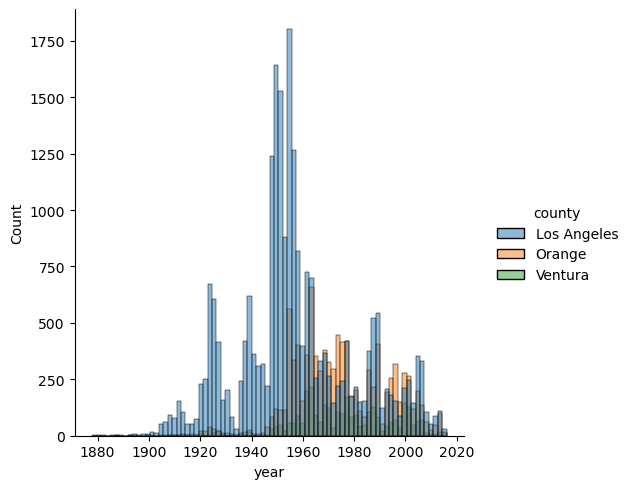

In [17]:
sns.displot(x ='year', data = train, hue = 'county')

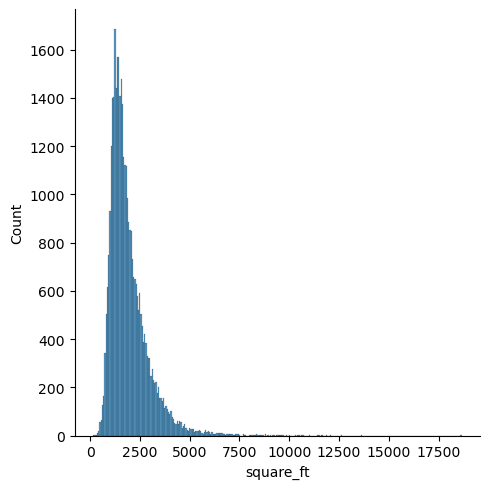

In [18]:
sns.displot(x = 'square_ft', data = train)

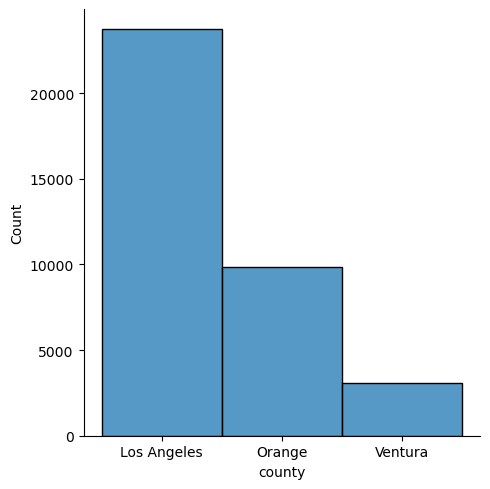

In [19]:
sns.displot(x = 'county', data = train)

<Axes: >

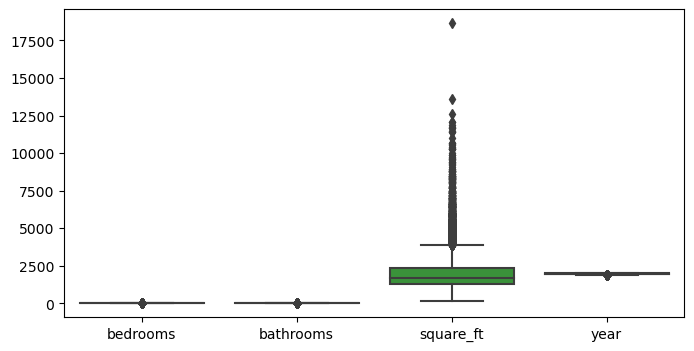

In [20]:
plt.figure(figsize = (8,4))
sns.boxplot(data = train.drop(columns = ['tax_value']))

(array([3.000e+00, 1.100e+01, 6.000e+00, 2.600e+01, 8.500e+01, 3.090e+02,
        2.920e+02, 6.380e+02, 1.583e+03, 7.270e+02, 7.370e+02, 1.586e+03,
        2.377e+03, 6.262e+03, 3.579e+03, 3.951e+03, 1.885e+03, 2.551e+03,
        1.503e+03, 2.117e+03, 1.666e+03, 1.619e+03, 1.556e+03, 1.124e+03,
        4.260e+02]),
 array([1878.  , 1883.52, 1889.04, 1894.56, 1900.08, 1905.6 , 1911.12,
        1916.64, 1922.16, 1927.68, 1933.2 , 1938.72, 1944.24, 1949.76,
        1955.28, 1960.8 , 1966.32, 1971.84, 1977.36, 1982.88, 1988.4 ,
        1993.92, 1999.44, 2004.96, 2010.48, 2016.  ]),
 <BarContainer object of 25 artists>)

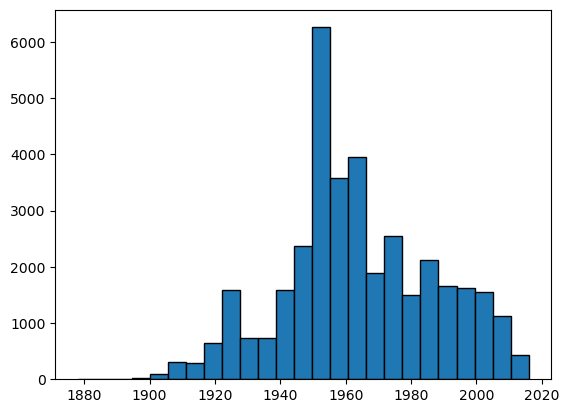

In [21]:
plt.hist(train.year, bins=25,ec='black')

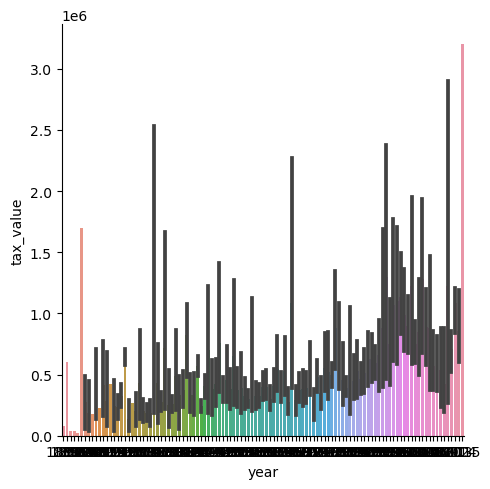

In [22]:
ex.catplt(train.sample(1_000), 'year', 'tax_value')

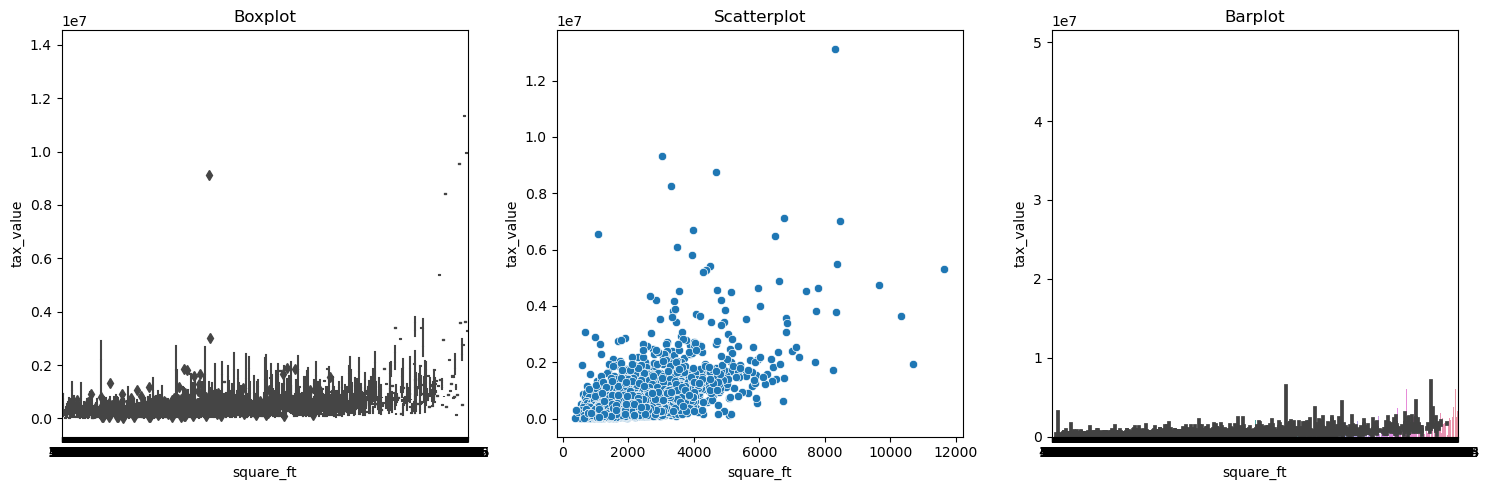

In [28]:
ex.plot_categorical_and_continuous_vars(train, 'square_ft', 'tax_value')

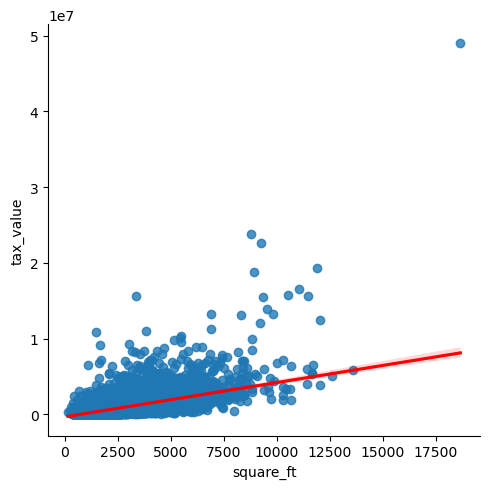

In [29]:
sns.lmplot(x="square_ft", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

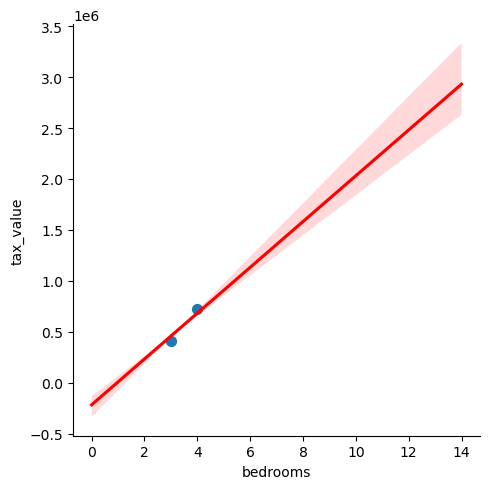

In [37]:
sns.lmplot(x="bedrooms", y="tax_value", data=train, line_kws={'color': 'red'}, x_bins = 3)
plt.show()

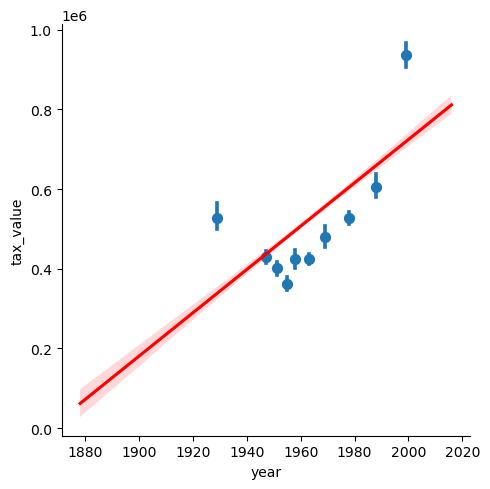

In [38]:
sns.lmplot(x="year", y="tax_value", data=train, line_kws={'color': 'red'}, x_bins = 10)
plt.show()

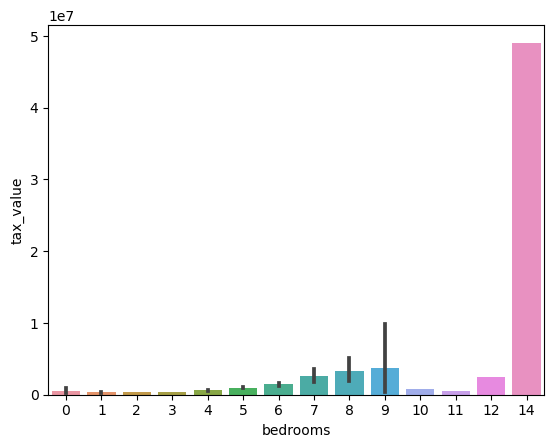

In [41]:
sns.barplot(data = train, x='bedrooms', y='tax_value')
plt.show()

In [40]:
train.bedrooms.value_counts()

3     16360
4     10673
2      5792
5      2793
6       435
1       424
7        74
0        39
8        17
9         6
12        3
11        1
10        1
14        1
Name: bedrooms, dtype: int64

In [53]:
train.bathrooms.value_counts()

2.0     15286
3.0      7574
1.0      6665
2.5      2732
4.0      1537
3.5       648
1.5       560
5.0       532
4.5       500
6.0       237
5.5       162
7.0        57
8.0        39
6.5        38
0.0        25
7.5        10
9.0         9
10.0        5
8.5         1
18.0        1
11.0        1
Name: bathrooms, dtype: int64

In [42]:
train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county
32701,3,1.0,1214,63940,1953,Los Angeles
25514,2,1.0,804,407808,1950,Los Angeles
7625,3,3.0,2332,139666,1952,Los Angeles
38358,3,2.0,1632,153856,1952,Los Angeles
24834,5,2.0,2269,661000,1963,Los Angeles


In [50]:

# Define bin edges (boundaries)
bin_edges = [2 ,40, 60, 80]  # These are the boundaries for the bins

# Create labels for the bins (optional)
bin_labels = ['Young', 'Middle-aged', 'Senior']

# Use pd.cut() to bin the 'Age' column
df['Age_Binned'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Print the DataFrame
print(df)


   Age   Age_Binned
0   25        Young
1   30        Young
2   35        Young
3   40        Young
4   45  Middle-aged
5   50  Middle-aged
6   55  Middle-aged
7   60  Middle-aged
8   65       Senior
9   70       Senior


In [ ]:
train, val, test = dp.dummies(train, val, test)

In [ ]:
to_scale = ['bedrooms', 'bathrooms', 'square_ft', 'year']

train, val, test = w.scale_data(train, val , test, to_scale)

In [ ]:
train.head()

In [ ]:
X_train, y_train = p.xy_split(train)
X_val, y_val = p.xy_split(val)

X_train.head()

## Exploration